In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(dataset_url)

In [3]:
# Display the first few rows
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
# Step 1: Preprocessing - Replace 'height' column with random values between 150 and 180
df['height'] = np.random.randint(150, 181, df.shape[0])

In [5]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
 Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
height       0
dtype: int64

Duplicate Rows: 0


In [8]:
# 1. Employee distribution across teams
team_counts = df['Team'].value_counts()
team_percentages = (team_counts / len(df)) * 100

In [7]:
print(df.columns)

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary', 'height'],
      dtype='object')


In [10]:
# 2. Segregate employees by their positions
position_counts = df['Position'].value_counts()

In [11]:
# 3. Predominant age group
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_distribution = df['age_group'].value_counts()


In [12]:
# 4. Team and position with highest salary expenditure
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

In [13]:
# 5. Correlation between age and salary
correlation = df[['Age', 'Salary']].corr()

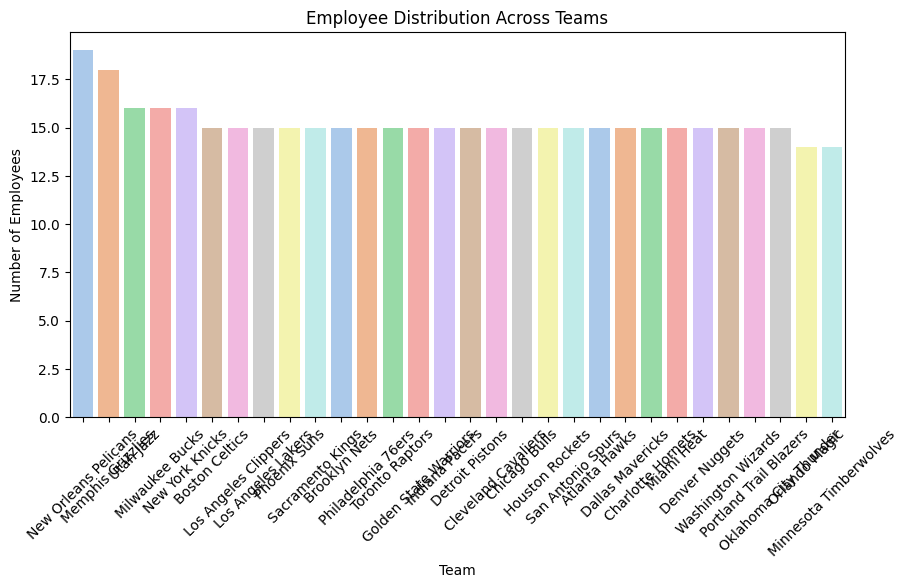

In [15]:
# Step 4: Visualization

plt.figure(figsize=(10,5))
sns.barplot(x=team_counts.index, y=team_counts.values,hue=team_counts.index,palette='pastel',dodge=False)
plt.xticks(rotation=45)
plt.title("Employee Distribution Across Teams")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.show()

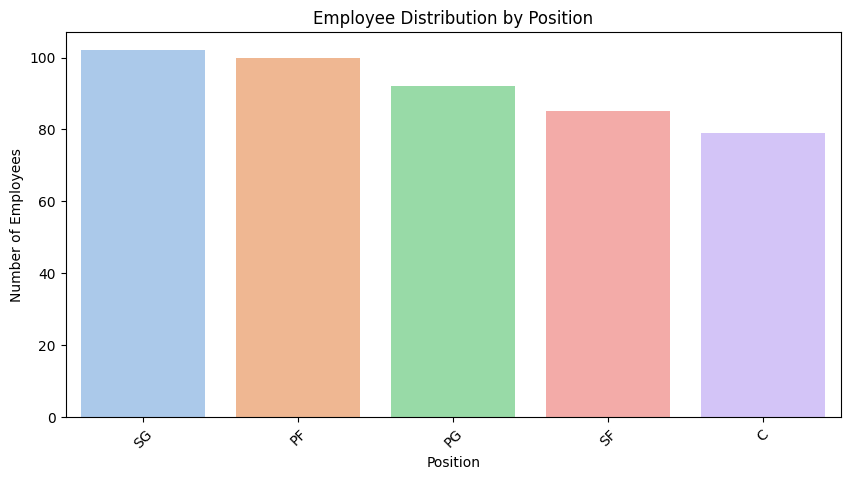

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=position_counts.index, y=position_counts.values,hue=position_counts.index, palette='pastel',dodge=False)
plt.xticks(rotation=45)
plt.title("Employee Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.show()

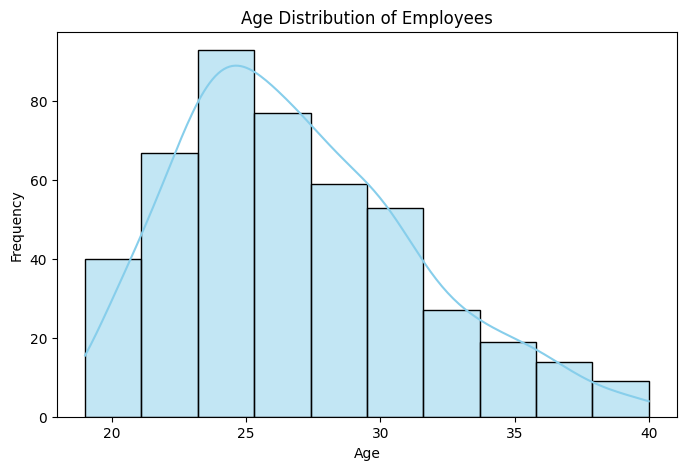

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


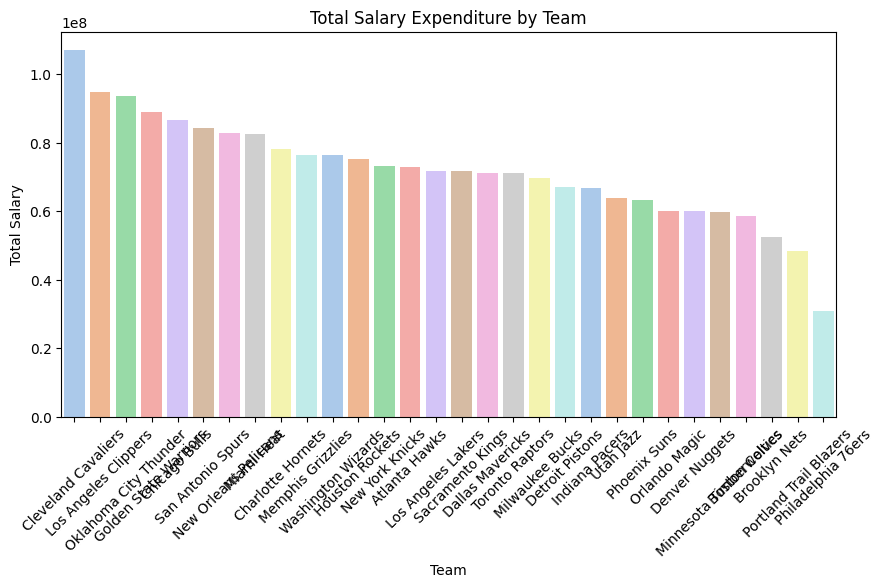

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=team_salary.index, y=team_salary.values,hue=team_salary.index, palette='pastel',dodge=False)
plt.xticks(rotation=45)
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.show()


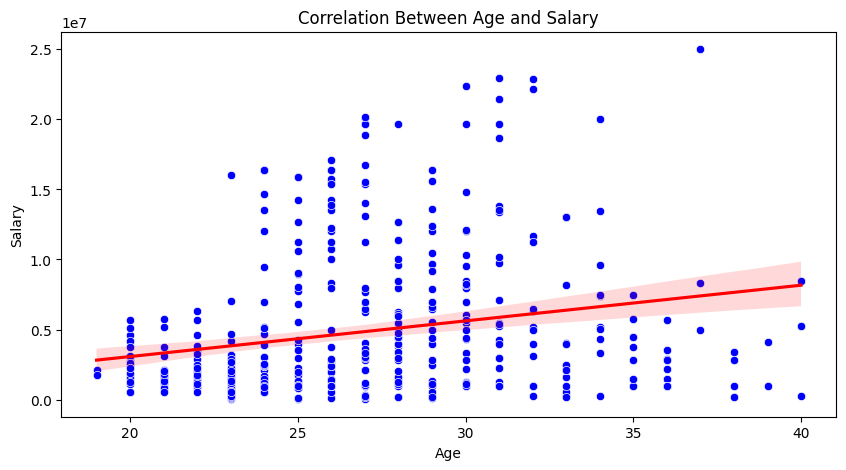

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Age'], y=df['Salary'], color='blue')
sns.regplot(x=df['Age'], y=df['Salary'], scatter=False, color='red')
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()


In [23]:
# Save the cleaned dataset
df.to_csv("cleaned_employee_data.csv", index=False)


In [24]:
print("\nProject Completed! Data cleaned, analyzed, and visualized.")



Project Completed! Data cleaned, analyzed, and visualized.
